In [1]:
import pandas as pd

In [2]:
names1880=pd.read_csv('C:\\Users\\Anu\\juypternotebook\\pydata-book-2nd-edition\\datasets\\babynames\\yob1880.txt',names=['name','sex','births'])

In [3]:
names1880.head()

,name,sex,births
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746


In [4]:
names1880.groupby('sex').sum()

,births
sex,
F,90993
M,110493


In [5]:
years=range(1880,2011)
columns=['name','sex','births']

    

In [6]:
frames=[]
for year in years:
    path='C:\\Users\\Anu\\juypternotebook\\pydata-book-2nd-edition\\datasets\\babynames\\yob%d.txt' % year
    frame=pd.read_csv(path,names=columns)
    frame['year']=year
    frames.append(frame)


In [7]:
names=pd.concat(frames,ignore_index=True)

In [8]:
names

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
...,...,...,...,...
1690779,Zymaire,M,5,2010
1690780,Zyonne,M,5,2010
1690781,Zyquarius,M,5,2010
1690782,Zyran,M,5,2010


In [9]:
birtsbyyear=names.groupby(['year','sex']).sum()

In [65]:
birtsbyyear=birtsbyyear.unstack(level=1)

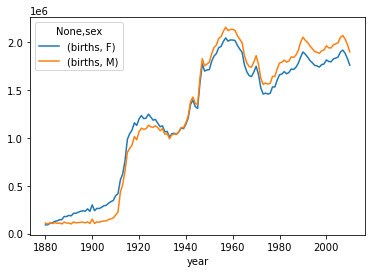

In [66]:
birtsbyyear.plot()

In [67]:
births=names.pivot_table(index='year',columns='sex',aggfunc='sum')
births

births         
sex         F        M
year                  
1880    90993   110493
1881    91955   100748
1882   107851   113687
1883   112322   104632
1884   129021   114445
...       ...      ...
2006  1896468  2050234
2007  1916888  2069242
2008  1883645  2032310
2009  1827643  1973359
2010  1759010  1898382

[131 rows x 2 columns]

In [68]:
def add_propotion(group):
    group['propotion']=group.births/group.births.sum()
    return group
prop=names.groupby(['year','sex']).apply(add_propotion)
prop

,name,sex,births,year,propotion
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
1690779,Zymaire,M,5,2010,0.000003
1690780,Zyonne,M,5,2010,0.000003
1690781,Zyquarius,M,5,2010,0.000003
1690782,Zyran,M,5,2010,0.000003


In [69]:
prop.groupby(['year','sex']).sum()

births  propotion
year sex                    
1880 F      90993        1.0
     M     110493        1.0
1881 F      91955        1.0
     M     100748        1.0
1882 F     107851        1.0
...           ...        ...
2008 M    2032310        1.0
2009 F    1827643        1.0
     M    1973359        1.0
2010 F    1759010        1.0
     M    1898382        1.0

[262 rows x 2 columns]

In [70]:
## top 100 names for year/sex
def top_n(n):         
    def top(group):
        return group.sort_values(by='births',ascending=False)[:n]
    return top
    
grouped=prop.groupby(['year','sex'])
top1000=grouped.apply(top_n(1000))
top1000.reset_index(inplace=True,drop=True)

In [71]:
top1000

,name,sex,births,year,propotion
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
261872,Camilo,M,194,2010,0.000102
261873,Destin,M,194,2010,0.000102
261874,Jaquan,M,194,2010,0.000102
261875,Jaydan,M,194,2010,0.000102


In [72]:
boys=top1000[top1000.sex=='M']
girls=top1000[top1000.sex=='F']
top1000

,name,sex,births,year,propotion
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
261872,Camilo,M,194,2010,0.000102
261873,Destin,M,194,2010,0.000102
261874,Jaquan,M,194,2010,0.000102
261875,Jaydan,M,194,2010,0.000102


In [73]:
total_births=top1000.pivot_table('births',index='year',columns='name',aggfunc=sum)
total_births.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 131 entries, 1880 to 2010
Columns: 6868 entries, Aaden to Zuri
dtypes: float64(6868)
memory usage: 6.9 MB


In [74]:
subset=total_births[['John','Harry','Mary','Marilyn']]
subset

name,John,Harry,Mary,Marilyn
year,,,,
1880,9701.0,2158.0,7092.0,NaN
1881,8795.0,2002.0,6948.0,NaN
1882,9597.0,2246.0,8179.0,NaN
1883,8934.0,2116.0,8044.0,NaN
1884,9427.0,2338.0,9253.0,NaN
...,...,...,...,...
2006,15140.0,414.0,4073.0,596.0
2007,14405.0,443.0,3665.0,597.0
2008,13273.0,379.0,3478.0,543.0


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000022CB7FEF3D0>,
      dtype=object)

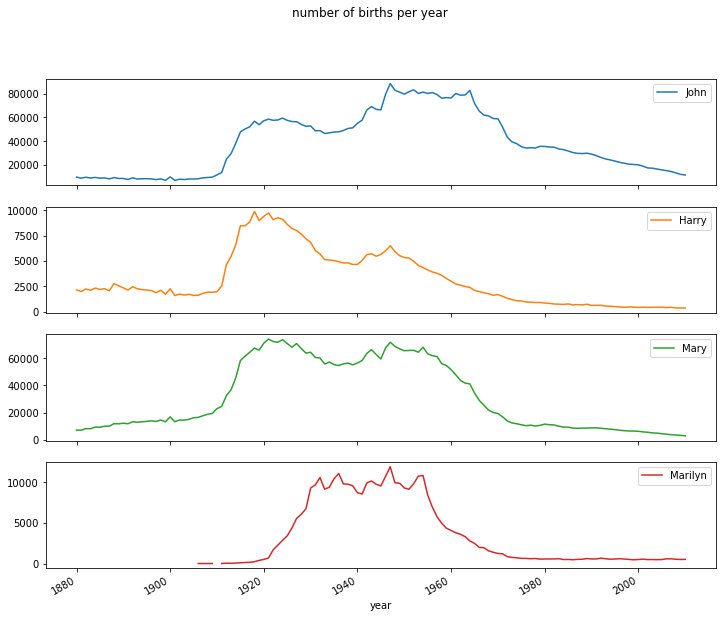

In [75]:
subset.plot(subplots=True,figsize=(12,10),grid=False,title='number of births per year')

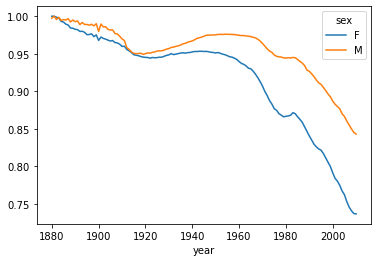

In [76]:
table=top1000.pivot_table('propotion' ,index='year',columns='sex',aggfunc=sum)
table.plot()

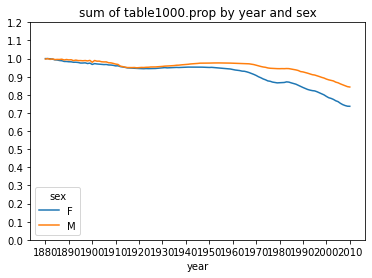

In [77]:
import numpy as np
table.plot(title='sum of table1000.prop by year and sex',yticks=np.linspace(0,1.2,13),xticks=range(1880,2020,10))

In [78]:
df=boys[boys.year==2010]
df

,name,sex,births,year,propotion
260877,Jacob,M,21875,2010,0.011523
260878,Ethan,M,17866,2010,0.009411
260879,Michael,M,17133,2010,0.009025
260880,Jayden,M,17030,2010,0.008971
260881,William,M,16870,2010,0.008887
...,...,...,...,...,...
261872,Camilo,M,194,2010,0.000102
261873,Destin,M,194,2010,0.000102
261874,Jaquan,M,194,2010,0.000102
261875,Jaydan,M,194,2010,0.000102


In [79]:
prop_cumsum=df.sort_values(by='propotion',ascending=False).propotion.cumsum()

In [80]:
prop_cumsum.values.searchsorted(0.5)

116

In [81]:
df=boys[boys.year==1880]
prop_cumsum=df.sort_values(by='propotion',ascending=False).propotion.cumsum()
prop_cumsum.values.searchsorted(0.5)

13

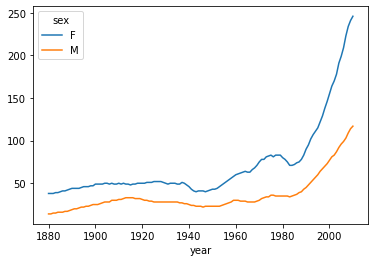

In [82]:
def get_quantile_count(group,q=0.5):
    prop_cumsum=group.sort_values(by='propotion',ascending=False).propotion.cumsum()
    return prop_cumsum.values.searchsorted(q) +1

diversity=top1000.groupby(['year','sex']).apply(get_quantile_count)
diversity=diversity.unstack('sex')

diversity.plot()
    

In [83]:
get_last_letter=lambda x:x[-1]
lastletters=names.name.map(get_last_letter)
lastletters

0          y
1          a
2          a
3          h
4          e
          ..
1690779    e
1690780    e
1690781    s
1690782    n
1690783    x
Name: name, Length: 1690784, dtype: object

In [84]:
lastletters.name='last_letter'
lastletters

0          y
1          a
2          a
3          h
4          e
          ..
1690779    e
1690780    e
1690781    s
1690782    n
1690783    x
Name: last_letter, Length: 1690784, dtype: object

In [85]:
table=names.pivot_table('births',index=lastletters,columns=['sex','year'],aggfunc=sum)
table

sex                F                                                        \
year            1880     1881     1882     1883     1884     1885     1886   
last_letter                                                                  
a            31446.0  31581.0  36536.0  38330.0  43680.0  45408.0  49100.0   
b                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
c                NaN      NaN      5.0      5.0      NaN      NaN      NaN   
d              609.0    607.0    734.0    810.0    916.0    862.0   1007.0   
e            33378.0  34080.0  40399.0  41914.0  48089.0  49616.0  53884.0   
f                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
g                7.0      5.0     12.0      8.0     24.0     11.0     18.0   
h             4863.0   4784.0   5567.0   5701.0   6602.0   6624.0   7146.0   
i               61.0     78.0     81.0     76.0     84.0     92.0     85.0   
j                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
k               13.0     15.0     11.0     17.0     21.0     18.0     27.0   
l             2541.0   2911.0   3527.0   3848.0   4808.0   5144.0   5721.0   
m               58.0     57.0     81.0     86.0     79.0     75.0    103.0   
n             3008.0   2959.0   3576.0   3837.0   4507.0   4735.0   5242.0   
o               30.0     49.0     35.0     47.0     74.0     84.0     93.0   
p                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
q                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
r              481.0    417.0    590.0    640.0    718.0    799.0    917.0   
s             1391.0   1316.0   1637.0   1794.0   2039.0   2127.0   2524.0   
t             2152.0   2165.0   2399.0   2554.0   2825.0   2889.0   3017.0   
u              380.0    427.0    410.0    444.0    490.0    495.0    511.0   
v                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
w                NaN      5.0      NaN      NaN      NaN      NaN      5.0   
x                NaN      NaN      NaN      7.0      NaN      NaN      NaN   
y            10469.0  10404.0  12145.0  12063.0  13917.0  13927.0  14936.0   
z              106.0     95.0    106.0    141.0    148.0    150.0    202.0   

sex                                     ...         M                      \
year            1887     1888     1889  ...      2001      2002      2003   
last_letter                             ...                                 
a            48942.0  59442.0  58631.0  ...   39124.0   38815.0   37825.0   
b                NaN      NaN      NaN  ...   50950.0   49284.0   48065.0   
c                NaN      NaN      NaN  ...   27113.0   27238.0   27697.0   
d             1027.0   1298.0   1374.0  ...   60838.0   55829.0   53391.0   
e            54353.0  66750.0  66663.0  ...  145395.0  144651.0  144769.0   
f                NaN      NaN      NaN  ...    1758.0    1817.0    1819.0   
g               25.0     44.0     28.0  ...    2151.0    2084.0    2009.0   
h             7141.0   8630.0   8826.0  ...   85959.0   88085.0   88226.0   
i              105.0    141.0    134.0  ...   20980.0   23610.0   26011.0   
j                NaN      NaN      NaN  ...    1069.0    1088.0    1203.0   
k               19.0     21.0     22.0  ...   42477.0   42043.0   42296.0   
l             6175.0   7900.0   8395.0  ...  153648.0  153493.0  153862.0   
m               90.0    123.0    137.0  ...   41967.0   42663.0   42790.0   
n             5512.0   6833.0   7103.0  ...  616099.0  630322.0  663419.0   
o               97.0    134.0    142.0  ...   82146.0   83180.0   85423.0   
p                NaN      NaN      NaN  ...    3419.0    3157.0    2982.0   
q                NaN      NaN      NaN  ...     602.0     618.0     585.0   
r              910.0   1207.0   1214.0  ...  165377.0  164821.0  169878.0   
s             2803.0   3582.0   3569.0  ...  143791.0  139595.0  138632.0   
t             3140.0   3816.0   3784.0  ...

In [87]:
subtable=table.reindex(columns=[1910,1960,2010],level='year')
subtable

sex                 F                            M                    
year             1910      1960      2010     1910      1960      2010
last_letter                                                           
a            108376.0  691247.0  670605.0    977.0    5204.0   28438.0
b                 NaN     694.0     450.0    411.0    3912.0   38859.0
c                 5.0      49.0     946.0    482.0   15476.0   23125.0
d              6750.0    3729.0    2607.0  22111.0  262112.0   44398.0
e            133569.0  435013.0  313833.0  28655.0  178823.0  129012.0
f                 NaN      20.0      97.0    152.0    9224.0    2255.0
g                57.0     318.0     657.0    437.0   20235.0    2666.0
h             20427.0   73247.0  133424.0   8848.0   80841.0   98090.0
i               605.0   80812.0   55820.0    164.0    1286.0   42956.0
j                 NaN       NaN     159.0      NaN       NaN    1459.0
k                48.0     315.0     626.0   7104.0  105315.0   35198.0
l             17121.0   68482.0   46360.0  12626.0  223716.0  133583.0
m               476.0   17417.0    4552.0  11272.0   72139.0   46808.0
n             31412.0  264258.0  246631.0  27851.0  325266.0  688677.0
o               658.0    4932.0    2187.0   3314.0   27358.0   81025.0
p                 7.0      47.0      35.0    616.0   12102.0    2409.0
q                 NaN       NaN      53.0      NaN       NaN     342.0
r              5308.0   13677.0   31707.0  12522.0   66183.0  166064.0
s             15477.0   25810.0   23451.0  25404.0  219080.0  123670.0
t             10877.0   30738.0   13773.0  14153.0  140015.0   43398.0
u               271.0    1161.0     734.0     24.0     122.0    2318.0
v                 NaN     122.0     205.0     22.0      78.0    2723.0
w                 8.0      63.0    2080.0   1229.0   16444.0   30656.0
x                 6.0      74.0    1279.0    770.0    3947.0   16352.0
y             43991.0  308504.0  205501.0  15021.0  343318.0  110425.0
z               967.0    1333.0    1238.0     33.0     392.0    3476.0

In [90]:
subtable.sum()

sex  year
F    1910     396416.0
     1960    2022062.0
     2010    1759010.0
M    1910     194198.0
     1960    2132588.0
     2010    1898382.0
dtype: float64

In [92]:
letter_prop=subtable/subtable.sum()
letter_prop

sex                 F                             M                    
year             1910      1960      2010      1910      1960      2010
last_letter                                                            
a            0.273390  0.341853  0.381240  0.005031  0.002440  0.014980
b                 NaN  0.000343  0.000256  0.002116  0.001834  0.020470
c            0.000013  0.000024  0.000538  0.002482  0.007257  0.012181
d            0.017028  0.001844  0.001482  0.113858  0.122908  0.023387
e            0.336941  0.215133  0.178415  0.147556  0.083853  0.067959
f                 NaN  0.000010  0.000055  0.000783  0.004325  0.001188
g            0.000144  0.000157  0.000374  0.002250  0.009488  0.001404
h            0.051529  0.036224  0.075852  0.045562  0.037907  0.051670
i            0.001526  0.039965  0.031734  0.000844  0.000603  0.022628
j                 NaN       NaN  0.000090       NaN       NaN  0.000769
k            0.000121  0.000156  0.000356  0.036581  0.049384  0.018541
l            0.043189  0.033867  0.026356  0.065016  0.104904  0.070367
m            0.001201  0.008613  0.002588  0.058044  0.033827  0.024657
n            0.079240  0.130687  0.140210  0.143415  0.152522  0.362771
o            0.001660  0.002439  0.001243  0.017065  0.012829  0.042681
p            0.000018  0.000023  0.000020  0.003172  0.005675  0.001269
q                 NaN       NaN  0.000030       NaN       NaN  0.000180
r            0.013390  0.006764  0.018025  0.064481  0.031034  0.087477
s            0.039042  0.012764  0.013332  0.130815  0.102730  0.065145
t            0.027438  0.015201  0.007830  0.072879  0.065655  0.022861
u            0.000684  0.000574  0.000417  0.000124  0.000057  0.001221
v                 NaN  0.000060  0.000117  0.000113  0.000037  0.001434
w            0.000020  0.000031  0.001182  0.006329  0.007711  0.016148
x            0.000015  0.000037  0.000727  0.003965  0.001851  0.008614
y            0.110972  0.152569  0.116828  0.077349  0.160987  0.058168
z            0.002439  0.000659  0.000704  0.000170  0.000184  0.001831

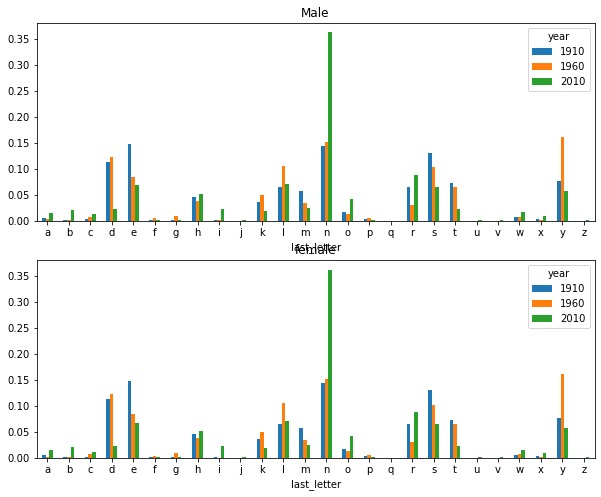

In [93]:
import matplotlib.pyplot as plt
fig,axes=plt.subplots(2,1,figsize=(10,8))
letter_prop['M'].plot(kind='bar',rot=0,ax=axes[0],title='Male')
letter_prop['M'].plot(kind='bar',rot=0,ax=axes[1],title='female')

In [94]:
letter_prop=table/table.sum()

In [95]:
dny_ts=letter_prop.loc[['d','n','y'],'M'].T
dny_ts.head()

last_letter,d,n,y
year,,,
1880,0.083055,0.153213,0.075760
1881,0.083247,0.153214,0.077451
1882,0.085340,0.149560,0.077537
1883,0.084066,0.151646,0.079144
1884,0.086120,0.149915,0.080405


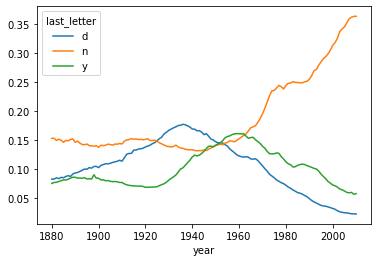

In [96]:
dny_ts.plot()

In [97]:
all_names=pd.Series(top1000.name.unique())
all_names

0            Mary
1            Anna
2            Emma
3       Elizabeth
4          Minnie
          ...    
6863        Masen
6864        Rowen
6865       Yousef
6866       Joziah
6867       Maxton
Length: 6868, dtype: object

In [98]:
lesley_like=all_names[all_names.str.lower().str.contains('lesl')]
lesley_like

632     Leslie
2294    Lesley
4262    Leslee
4728     Lesli
6103     Lesly
dtype: object

In [100]:
filtered=top1000[top1000.name.isin(lesley_like)]
filtered.groupby('name').births.sum()

name
Leslee      1082
Lesley     35022
Lesli        929
Leslie    370429
Lesly      10067
Name: births, dtype: int64

In [102]:
table=filtered.pivot_table('births',index='year',columns='sex',aggfunc=sum)
table

sex,F,M
year,,
1880,8.0,79.0
1881,11.0,92.0
1882,9.0,128.0
1883,7.0,125.0
1884,15.0,125.0
...,...,...
2006,4166.0,NaN
2007,3805.0,NaN
2008,3022.0,NaN


In [108]:
table=table.div(table.sum(1),axis=0)


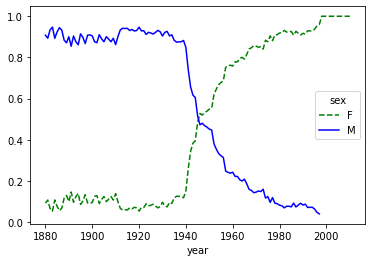

In [110]:
table.plot(style={'M':'b-','F':'g--'})